# Automatic blurring of persons and cars
<a href="https://colab.research.google.com/drive/1fdbc26wKRtQRMqPe6M149LDNL6-1G0ck?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> ![Maintainer](https://dataroots.io/maintained-rnd.svg)

This notebook aims to show a small pipeline where all persons and cars in an image are anonymized. It uses Mask RCNN or grounded SAM.

## 1. Prerequisites

In [ ]:
# Download the code from Github
!git clone https://github.com/datarootsio/onwheels.git
%cd onwheels/autoblurring/notebooks/

Cloning into 'onwheels'...
remote: Enumerating objects: 1487, done.
remote: Counting objects: 100% (368/368), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 1487 (delta 198), reused 265 (delta 106), pack-reused 1119
Receiving objects: 100% (1487/1487), 62.36 MiB | 21.53 MiB/s, done.
Resolving deltas: 100% (858/858), done.
/content/onwheels/autoblurring/notebooks/onwheels/autoblurring/notebooks


In [ ]:
# Install the requirements
!pip install -r requirements.txt

## 2. Upload an image

In [ ]:
%cd onwheels/autoblurring/notebooks/
from google.colab import files

uploaded = files.upload()
input_img = list(uploaded.keys())[0]

[Errno 2] No such file or directory: 'onwheels/autoblurring/notebooks/'
/content/onwheels/autoblurring/notebooks/onwheels/autoblurring/notebooks


Saving normal_img.jpg to normal_img.jpg


## 3. Load the models

In [ ]:
import sys

# setting path
sys.path.append("..")

# import modules
from src.auto_blurring import groundedSAM, maskRCNN

method1 = maskRCNN()
method2 = groundedSAM()

Download weights for maskrcnn
Download configuration file for maskrcnn
Start loading maskrcnn model...
maskrcnn loaded
Download SAM
Download weights for groundingDINO
Download configuration file for groundingDINO
Start loading SAM model...
SAM model loaded
Start loading groundingDINO model...


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


groundingDINO model loaded


 ## 4. Set your parameters

In [ ]:
model_choice = "groundedSAM"  # @param ["maskRCNN", "groundedSAM"]

## 5. Process the image

In [ ]:
# wrapper function
def process_image(img, model_choice="maskRCNN"):
    """Wrapper function to process the image with the chosen anonimization model.

    Input:
        - img           : the image
        - model_choice  : the chosen model (either groundedSAM or maskRCNN)
    """
    if model_choice == "groundedSAM":
        output_img = method2(img)
    elif model_choice == "maskRCNN":
        output_img = method1(img)
    else:
        print("Choose from the model options: groundedSAM or maskRCNN")
        return img
    return output_img


# Process the image

output_img = process_image(input_img, model_choice)

loaded image


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


predicted boxes
predicted masks


## 6. See the resulting image

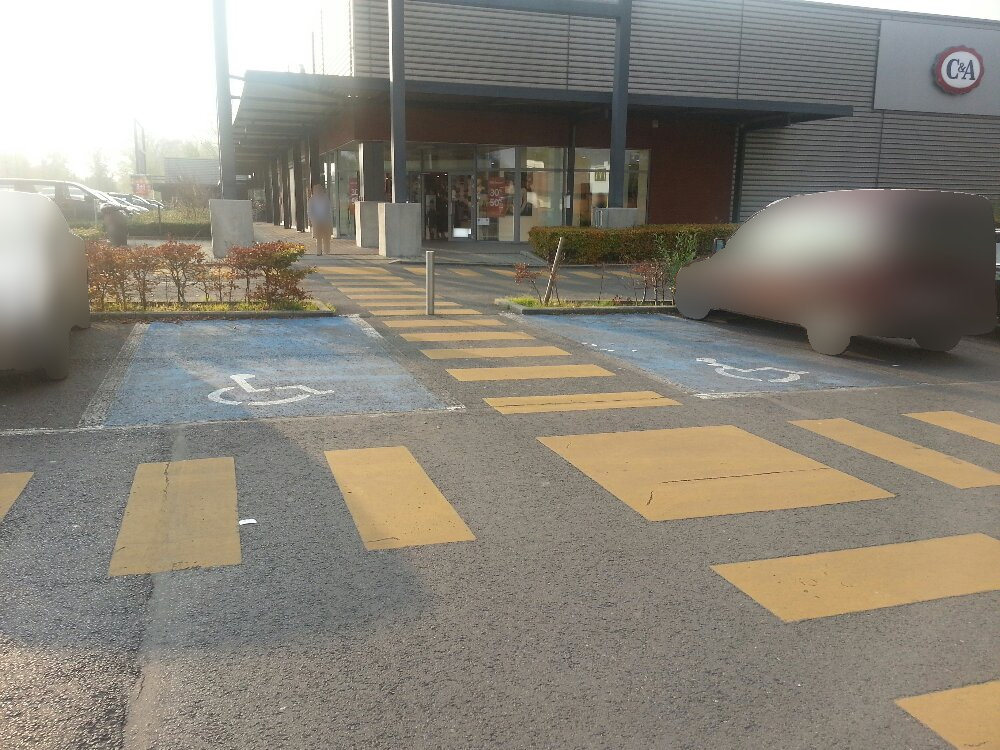

In [ ]:
output_img